In [1]:
import datetime

import pandas as pd
import warnings

pd.set_option("mode.chained_assignment", None)
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from experiments.common.utils import snowflake_query_from_file

# df_sequence_20230101 = snowflake_query_from_file('../sql/sequence_query.sql')
#df_sequence_20230101.to_csv('../data/sequence_20230101.csv', index=False, sep='|')

In [3]:
# read from csv
df_sequence_20230101 = pd.read_csv('../data/sequence_20230101.csv', sep='|')

/var/folders/87/68jxvfgs4f91bq6p06d8lzpc0000gp/T/ipykernel_5564/2171992985.py:2: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sequence_20230101 = pd.read_csv('../data/sequence_20230101.csv', sep='|')


In [4]:
# test if the contact and company is 1 to 1 
seq_contact_company_df = df_sequence_20230101.groupby(by=['SEQUENCE_ID', 'CONTACT_ID'])[
    ['CONTACT_COMPANY_NAME']].nunique()

In [5]:
# conclusion is Yes 
seq_contact_company_df[seq_contact_company_df['CONTACT_COMPANY_NAME'] > 1]

,,CONTACT_COMPANY_NAME
SEQUENCE_ID,CONTACT_ID,


In [6]:
print('\n'.join(df_sequence_20230101.columns))

OCCURRED_DATE
SEQUENCE_ID
SEQUENCE_NAME
STEP_ID
TEMPLATE_ID
SEQUENCE_ENROLLMENT_ID
SEQUENCE_STEP_EXCUTION_ID
CONTACT_ID
CONTACT_FIRST_NAME
CONTACT_LAST_NAME
CONTACT_COMPANY_ID
CONTACT_COMPANY_NAME
SENT_COUNT
REPLY_COUNT
OPEN_COUNT
MEETING_BOOKED_COUNT
CONTACT_UPDATE_DATE
CONTACT_CITY
CONTACT_COMPANY
CONTACT_COUNTRY
CONTACT_CREATE_DATE
CONTACT_CREATE_TIMESTAMP
CONTACT_EAMIL
CONTACT_FIRST_DEAL_CREATE_DATE
CONTACT_ADDITIONAL_EMAIL
CONTACT_EMAIL_DOMAIN
CONTACT_IP_TIMEZONE
CONTACT_IS_UNWORKED
CONTACT_LATEST_SEQUENCE_ENDED_DATE
CONTACT_LATEST_SEQUENCE_ENDED_TIMESTAMP
CONTACT_LATEST_SEQUENCE_ENROLLED_DATE
CONTACT_LATEST_SEQUENCE_ENTROLLED_TIMESTAMP
CONTACT_LEAD_STATUS
CONTACT_SEQUENCES_ENROLLED_COUNT
CONTACT_SEQUENCES_IS_ENROLLED
CONTACT_TIME_BETWEEN_CONTACT_CREATION_AND_DEAL_CREATION
CONTACT_HUBSPOT_OWNER_ID
CONTACT_HUBSPOT_TEAM_ID
CONTACT_JOB_TITLE
CONTACT_LAST_MODIFIED_DATE
CONTACT_LAST_MODIFED_TIMESTAMP
CONTACT_LEAD_SOURCE
CONTACT_LINKEDIN
CONTACT_MOBILE_PHONE
CONTACT_NUM_ASSOCIATED_DEALS

In [7]:
df_sequence_20230101.head()

,OCCURRED_DATE,SEQUENCE_ID,SEQUENCE_NAME,STEP_ID,TEMPLATE_ID,SEQUENCE_ENROLLMENT_ID,SEQUENCE_STEP_EXCUTION_ID,CONTACT_ID,CONTACT_FIRST_NAME,CONTACT_LAST_NAME,...,COMPANY_PM_SOFTWARE,COMPANY_PROTFOLIO_SUBTYPE,COMPANY_PROTFOLIO_TYPE,COMPANY_RENT_PORTAL,COMPANY_SEGMENT,COMPANY_STATE,COMPANY_TIMEZONE,COMPANY_UNITS,COMPANY_WEBSITE,COMPANY_ZIPCODE
0,20230410,76684087,Portal Sequence,0,37999983,6732583864,76684087-1568041278-6732583864,35548,Chris,Honeycutt,...,NaN,NaN,Multi Family,NaN,Deep SMB,CA,America/Los_Angeles,247,http://conmgmt.com/Constellation_Realty_Manage...,92101
1,20230922,90434194,Micro Segment 1 - Deep SMB - < 250,2,48653112,8045771370,90434194-1858371402-8045771370,35548,Chris,Honeycutt,...,NaN,NaN,Multi Family,NaN,Deep SMB,CA,America/Los_Angeles,247,http://conmgmt.com/Constellation_Realty_Manage...,92101
2,20230424,76684087,Portal Sequence,2,38000003,6732583936,76684087-1568041278-6732583936,35548,Chris,Honeycutt,...,NaN,NaN,Multi Family,NaN,Deep SMB,CA,America/Los_Angeles,247,http://conmgmt.com/Constellation_Realty_Manage...,92101
3,20230414,76684087,Portal Sequence,1,37999996,6732583865,76684087-1568041278-6732583865,35548,Chris,Honeycutt,...,NaN,NaN,Multi Family,NaN,Deep SMB,CA,America/Los_Angeles,247,http://conmgmt.com/Constellation_Realty_Manage...,92101
4,20230512,76684087,Portal Sequence,4,38000054,6732583938,76684087-1568041278-6732583938,35548,Chris,Honeycutt,...,NaN,NaN,Multi Family,NaN,Deep SMB,CA,America/Los_Angeles,247,http://conmgmt.com/Constellation_Realty_Manage...,92101


### useful columns
- target: 'SENT_COUNT', 'REPLY_COUNT', 'OPEN_COUNT', 'MEETING_BOOKED_COUNT'
- variables: 
    -   'SEQUENCE_ID', 'TEMPLATE_ID', 
    -   'CONTACT_JOB_TITLE', 'CONTACT_CITY', 'CONTACT_STATE', 
    -   'COMPANY_ANNUAL_REVENUE', 'COMPANY_FOUNDED_YEAR','COMPANY_UNITS', 'COMPANY_PROTFOLIO_TYPE', 'COMPANY_PROTFOLIO_SUBTYPE', 'COMPANY_SEGMENT', 'COMPANY_STATE', ]

In [8]:
#fill None value of performance with 0
subset = ['SENT_COUNT', 'REPLY_COUNT', 'OPEN_COUNT', 'MEETING_BOOKED_COUNT']
df_sequence_20230101.loc[:, subset] = df_sequence_20230101.loc[:, subset].fillna(0).astype(int)

In [9]:
seq_contact_company_df = (df_sequence_20230101.groupby(by=['SEQUENCE_ID', 'CONTACT_ID', 'CONTACT_COMPANY_NAME'])
                          .agg(send_count=('SENT_COUNT', 'sum'),
                               reply_count=('REPLY_COUNT', 'sum'),
                               meeting_booked_count=('MEETING_BOOKED_COUNT', 'sum'),
                               open_count=('OPEN_COUNT', 'sum'),
                               contact_job_title=('CONTACT_JOB_TITLE', 'first'),
                               company_protfolio_type=('COMPANY_PROTFOLIO_TYPE', 'first'),
                               company_protfolio_subtype=('COMPANY_PROTFOLIO_SUBTYPE', 'first'),
                               company_segment=('COMPANY_SEGMENT', 'first'),
                               company_state=('COMPANY_STATE', 'first'),
                               contact_state=('CONTACT_STATE', 'first'),
                               company_annual_revenue=('COMPANY_ANNUAL_REVENUE', 'first'),
                               company_founded_year=('COMPANY_FOUNDED_YEAR', 'first'),
                               company_units=('COMPANY_UNITS', 'first'),
                               )).reset_index()

In [10]:
seq_contact_company_df

,SEQUENCE_ID,CONTACT_ID,CONTACT_COMPANY_NAME,send_count,reply_count,meeting_booked_count,open_count,contact_job_title,company_protfolio_type,company_protfolio_subtype,company_segment,company_state,contact_state,company_annual_revenue,company_founded_year,company_units
0,1758690,45075501,Gallaher Homes,2.0,0.0,0.0,0.0,Senior Executive Director,Multi Family,None,SMB,CA,None,10000000.0,1979.0,3568
1,1758690,58750151,Group Fox Management 411E,2.0,0.0,0.0,0.0,Controller,Multi Family,Conventional,SMB,IL,None,1000000.0,1978.0,3758
2,37046485,58748001,TestFlex,2.0,0.0,0.0,1.0,None,Manufactured Homes;Manufacturing Housing;Multi...,Conventional,Deep SMB,None,None,NaN,NaN,2
3,37380911,20811,Univesco,4.0,1.0,0.0,6.0,Assistant VP,Multi Family,None,SMB,TX,TX,1000000.0,1991.0,3997
4,37380911,23077,Schnitzer Properties,4.0,0.0,0.0,1.0,VP/Operations Manager,Multi Family,Conventional,SMB,OR,CA,NaN,1950.0,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24790,91512838,60224052,Sutton Real Estate Company,1.0,0.0,0.0,0.0,"Manager, Property",Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170
24791,91512838,60224053,Sutton Real Estate Company,1.0,0.0,0.0,0.0,"Manager, Property",Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170
24792,91512838,60224055,Sutton Real Estate Company,1.0,0.0,0.0,1.0,Leasing Agent,Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170
24793,91512838,60224101,Sutton Real Estate Company,1.0,0.0,0.0,0.0,Leasing Agent,Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170


In [11]:
seq_contact_company_df['reply_count_binary'] = seq_contact_company_df['reply_count'].apply(lambda x: 1 if x > 0 else 0)
seq_contact_company_df['open_count_binary'] = seq_contact_company_df['open_count'].apply(lambda x: 1 if x > 0 else 0)
seq_contact_company_df['meeting_booked_count_binary'] = seq_contact_company_df['meeting_booked_count'].apply(
    lambda x: 1 if x > 0 else 0)
import datetime

seq_contact_company_df['company_founded_years'] = datetime.datetime.now().year - seq_contact_company_df[
    'company_founded_year']
seq_contact_company_df

,SEQUENCE_ID,CONTACT_ID,CONTACT_COMPANY_NAME,send_count,reply_count,meeting_booked_count,open_count,contact_job_title,company_protfolio_type,company_protfolio_subtype,company_segment,company_state,contact_state,company_annual_revenue,company_founded_year,company_units,reply_count_binary,open_count_binary,meeting_booked_count_binary,company_founded_years
0,1758690,45075501,Gallaher Homes,2.0,0.0,0.0,0.0,Senior Executive Director,Multi Family,None,SMB,CA,None,10000000.0,1979.0,3568,0,0,0,44.0
1,1758690,58750151,Group Fox Management 411E,2.0,0.0,0.0,0.0,Controller,Multi Family,Conventional,SMB,IL,None,1000000.0,1978.0,3758,0,0,0,45.0
2,37046485,58748001,TestFlex,2.0,0.0,0.0,1.0,None,Manufactured Homes;Manufacturing Housing;Multi...,Conventional,Deep SMB,None,None,NaN,NaN,2,0,1,0,NaN
3,37380911,20811,Univesco,4.0,1.0,0.0,6.0,Assistant VP,Multi Family,None,SMB,TX,TX,1000000.0,1991.0,3997,1,1,0,32.0
4,37380911,23077,Schnitzer Properties,4.0,0.0,0.0,1.0,VP/Operations Manager,Multi Family,Conventional,SMB,OR,CA,NaN,1950.0,1500,0,1,0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24790,91512838,60224052,Sutton Real Estate Company,1.0,0.0,0.0,0.0,"Manager, Property",Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170,0,0,0,90.0
24791,91512838,60224053,Sutton Real Estate Company,1.0,0.0,0.0,0.0,"Manager, Property",Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170,0,0,0,90.0
24792,91512838,60224055,Sutton Real Estate Company,1.0,0.0,0.0,1.0,Leasing Agent,Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170,0,1,0,90.0
24793,91512838,60224101,Sutton Real Estate Company,1.0,0.0,0.0,0.0,Leasing Agent,Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170,0,0,0,90.0


# Correlation Check for Sequence Level

In [12]:

from experiments.common.utils import chi2_test_encode

cat_cols = ['SEQUENCE_ID',
            'contact_job_title',
            'company_protfolio_type',
            'company_protfolio_subtype',
            'company_segment',
            'company_state',
            'contact_state',

            ]
num_cols = ['company_annual_revenue',
            'company_units',
            'company_founded_years']

target_cols = ['reply_count_binary', 'meeting_booked_count_binary', 'open_count_binary']

#categorical variables 
chi2_result_seq = chi2_test_encode(seq_contact_company_df, cat_cols, target_cols)
for index, target_col in enumerate(target_cols):
    print(f'Chi2 Test for {target_col}')
    display(chi2_result_seq[index])

# numerical variables
correlation_matrix = seq_contact_company_df[num_cols + target_cols].corr()
display(correlation_matrix)

Chi2 Test for reply_count_binary


,ftr,score,pval,p_test
0,SEQUENCE_ID,2.646233e+08,0.000000e+00,SIG
1,contact_job_title,2.639916e+02,2.314600e-59,SIG
6,contact_state,9.786346e+01,4.482500e-23,SIG
5,company_state,6.639409e+01,3.692069e-16,SIG
3,company_protfolio_subtype,4.984522e+01,1.663655e-12,SIG
2,company_protfolio_type,3.897129e-01,5.324503e-01,N-SIG
4,company_segment,5.786415e-04,9.808088e-01,N-SIG


Chi2 Test for meeting_booked_count_binary


,ftr,score,pval,p_test
0,SEQUENCE_ID,45363.923285,0.000000e+00,SIG
5,company_state,100.695197,1.072854e-23,SIG
6,contact_state,80.249796,3.299465e-19,SIG
3,company_protfolio_subtype,34.997757,3.300854e-09,SIG
1,contact_job_title,31.828177,1.684315e-08,SIG
4,company_segment,0.326873,5.675059e-01,N-SIG
2,company_protfolio_type,0.172252,6.781178e-01,N-SIG


Chi2 Test for open_count_binary


,ftr,score,pval,p_test
0,SEQUENCE_ID,3.238933e+08,0.000000,SIG
1,contact_job_title,8.274548e+03,0.000000,SIG
4,company_segment,9.870385e+00,0.001680,SIG
6,contact_state,7.128291e+00,0.007588,SIG
2,company_protfolio_type,2.293453e+00,0.129921,N-SIG
5,company_state,3.147294e-01,0.574792,N-SIG
3,company_protfolio_subtype,4.128147e-02,0.838996,N-SIG


,company_annual_revenue,company_units,company_founded_years,reply_count_binary,meeting_booked_count_binary,open_count_binary
company_annual_revenue,1.000000,0.128880,0.093122,0.006105,-0.006278,0.024144
company_units,0.128880,1.000000,0.072382,-0.030674,-0.009723,-0.032926
company_founded_years,0.093122,0.072382,1.000000,-0.029499,-0.013401,-0.049923
reply_count_binary,0.006105,-0.030674,-0.029499,1.000000,0.026253,0.254120
meeting_booked_count_binary,-0.006278,-0.009723,-0.013401,0.026253,1.000000,0.032315
open_count_binary,0.024144,-0.032926,-0.049923,0.254120,0.032315,1.000000


# Correlation Check for Template Level

In [13]:
template_seq_contact_company_df = (
    df_sequence_20230101.groupby(by=['SEQUENCE_ID', 'CONTACT_ID', 'CONTACT_COMPANY_NAME', 'TEMPLATE_ID'])
    .agg(send_count=('SENT_COUNT', 'sum'),
         reply_count=('REPLY_COUNT', 'sum'),
         meeting_booked_count=('MEETING_BOOKED_COUNT', 'sum'),
         open_count=('OPEN_COUNT', 'sum'),
         contact_job_title=('CONTACT_JOB_TITLE', 'first'),
         company_protfolio_type=('COMPANY_PROTFOLIO_TYPE', 'first'),
         company_protfolio_subtype=('COMPANY_PROTFOLIO_SUBTYPE', 'first'),
         company_segment=('COMPANY_SEGMENT', 'first'),
         company_state=('COMPANY_STATE', 'first'),
         contact_state=('CONTACT_STATE', 'first'),
         company_annual_revenue=('COMPANY_ANNUAL_REVENUE', 'first'),
         company_founded_year=('COMPANY_FOUNDED_YEAR', 'first'),
         company_units=('COMPANY_UNITS', 'first'),
         )).reset_index()
template_seq_contact_company_df

,SEQUENCE_ID,CONTACT_ID,CONTACT_COMPANY_NAME,TEMPLATE_ID,send_count,reply_count,meeting_booked_count,open_count,contact_job_title,company_protfolio_type,company_protfolio_subtype,company_segment,company_state,contact_state,company_annual_revenue,company_founded_year,company_units
0,1758690,45075501,Gallaher Homes,17748430,1.0,0.0,0.0,0.0,Senior Executive Director,Multi Family,None,SMB,CA,None,10000000.0,1979.0,3568
1,1758690,45075501,Gallaher Homes,17748531,1.0,0.0,0.0,0.0,Senior Executive Director,Multi Family,None,SMB,CA,None,10000000.0,1979.0,3568
2,1758690,58750151,Group Fox Management 411E,17748430,1.0,0.0,0.0,0.0,Controller,Multi Family,Conventional,SMB,IL,None,1000000.0,1978.0,3758
3,1758690,58750151,Group Fox Management 411E,17748531,1.0,0.0,0.0,0.0,Controller,Multi Family,Conventional,SMB,IL,None,1000000.0,1978.0,3758
4,37046485,58748001,TestFlex,14198716,1.0,0.0,0.0,0.0,None,Manufactured Homes;Manufacturing Housing;Multi...,Conventional,Deep SMB,None,None,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78391,91512838,60224052,Sutton Real Estate Company,50091173,1.0,0.0,0.0,0.0,"Manager, Property",Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170
78392,91512838,60224053,Sutton Real Estate Company,50091173,1.0,0.0,0.0,0.0,"Manager, Property",Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170
78393,91512838,60224055,Sutton Real Estate Company,50091173,1.0,0.0,0.0,1.0,Leasing Agent,Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170
78394,91512838,60224101,Sutton Real Estate Company,50091173,1.0,0.0,0.0,0.0,Leasing Agent,Multi Family,None,SMB,NY,NY,1000000.0,1933.0,1170


In [14]:
template_seq_contact_company_df['reply_count_binary'] = template_seq_contact_company_df['reply_count'].apply(
    lambda x: 1 if x > 0 else 0)
template_seq_contact_company_df['open_count_binary'] = template_seq_contact_company_df['open_count'].apply(
    lambda x: 1 if x > 0 else 0)
template_seq_contact_company_df['meeting_booked_count_binary'] = template_seq_contact_company_df[
    'meeting_booked_count'].apply(lambda x: 1 if x > 0 else 0)
template_seq_contact_company_df['company_founded_years'] = datetime.datetime.now().year - \
                                                           template_seq_contact_company_df[
                                                               'company_founded_year']

In [15]:
cat_cols = ['SEQUENCE_ID',
            'TEMPLATE_ID',
            'contact_job_title',
            'company_protfolio_type',
            'company_protfolio_subtype',
            'company_segment',
            'company_state',
            'contact_state',

            ]
num_cols = ['company_annual_revenue',
            'company_units',
            'company_founded_years']

chi2_result_template = chi2_test_encode(template_seq_contact_company_df, cat_cols, target_cols)
for index, target_col in enumerate(target_cols):
    print(f'Chi2 Test for {target_col}')
    display(chi2_result_template[index])

# numerical variables
correlation_matrix = template_seq_contact_company_df[num_cols + target_cols].corr()
display(correlation_matrix)

Chi2 Test for reply_count_binary


,ftr,score,pval,p_test
0,SEQUENCE_ID,1.642935e+08,0.000000e+00,SIG
1,TEMPLATE_ID,1.027999e+08,0.000000e+00,SIG
4,company_protfolio_subtype,1.046832e+02,1.433127e-24,SIG
7,contact_state,9.005592e+01,2.315234e-21,SIG
2,contact_job_title,8.998988e+01,2.393809e-21,SIG
6,company_state,5.600271e+01,7.237123e-14,SIG
3,company_protfolio_type,1.105924e+00,2.929698e-01,N-SIG
5,company_segment,1.806093e-01,6.708501e-01,N-SIG


Chi2 Test for meeting_booked_count_binary


,ftr,score,pval,p_test
0,SEQUENCE_ID,38880.273735,0.000000e+00,SIG
1,TEMPLATE_ID,6163.318304,0.000000e+00,SIG
6,company_state,98.716391,2.913804e-23,SIG
7,contact_state,79.192600,5.634071e-19,SIG
4,company_protfolio_subtype,39.302109,3.630491e-10,SIG
2,contact_job_title,25.074155,5.516733e-07,SIG
5,company_segment,0.385996,5.344119e-01,N-SIG
3,company_protfolio_type,0.217040,6.413047e-01,N-SIG


Chi2 Test for open_count_binary


,ftr,score,pval,p_test
0,SEQUENCE_ID,4.602324e+08,0.000000e+00,SIG
1,TEMPLATE_ID,2.383513e+08,0.000000e+00,SIG
2,contact_job_title,2.443554e+04,0.000000e+00,SIG
5,company_segment,6.514562e+01,6.956272e-16,SIG
6,company_state,3.144137e+01,2.055541e-08,SIG
7,contact_state,1.885486e+01,1.410512e-05,SIG
3,company_protfolio_type,3.944979e+00,4.701143e-02,SIG
4,company_protfolio_subtype,1.873572e+00,1.710665e-01,N-SIG


,company_annual_revenue,company_units,company_founded_years,reply_count_binary,meeting_booked_count_binary,open_count_binary
company_annual_revenue,1.000000,0.114520,0.082763,0.003085,-0.003474,0.038253
company_units,0.114520,1.000000,0.079379,-0.013178,-0.005638,-0.032130
company_founded_years,0.082763,0.079379,1.000000,-0.015490,-0.007602,-0.041857
reply_count_binary,0.003085,-0.013178,-0.015490,1.000000,0.017239,0.193500
meeting_booked_count_binary,-0.003474,-0.005638,-0.007602,0.017239,1.000000,0.020577
open_count_binary,0.038253,-0.032130,-0.041857,0.193500,0.020577,1.000000


# Model Build for Sequence Level

In [16]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
target = 'reply_count_binary'
X = seq_contact_company_df[['SEQUENCE_ID',
                            'contact_job_title',
                            'company_protfolio_type',
                            'company_protfolio_subtype',
                            'company_segment',
                            'company_state',
                            'contact_state',
                            'company_annual_revenue',
                            'company_units',
                            'company_founded_years'
                            ]]  # Adjust 'target' to your target variable's name
y = seq_contact_company_df[target]

In [18]:
X

,SEQUENCE_ID,contact_job_title,company_protfolio_type,company_protfolio_subtype,company_segment,company_state,contact_state,company_annual_revenue,company_units,company_founded_years
0,1758690,Senior Executive Director,Multi Family,None,SMB,CA,None,10000000.0,3568,44.0
1,1758690,Controller,Multi Family,Conventional,SMB,IL,None,1000000.0,3758,45.0
2,37046485,None,Manufactured Homes;Manufacturing Housing;Multi...,Conventional,Deep SMB,None,None,NaN,2,NaN
3,37380911,Assistant VP,Multi Family,None,SMB,TX,TX,1000000.0,3997,32.0
4,37380911,VP/Operations Manager,Multi Family,Conventional,SMB,OR,CA,NaN,1500,73.0
...,...,...,...,...,...,...,...,...,...,...
24790,91512838,"Manager, Property",Multi Family,None,SMB,NY,NY,1000000.0,1170,90.0
24791,91512838,"Manager, Property",Multi Family,None,SMB,NY,NY,1000000.0,1170,90.0
24792,91512838,Leasing Agent,Multi Family,None,SMB,NY,NY,1000000.0,1170,90.0
24793,91512838,Leasing Agent,Multi Family,None,SMB,NY,NY,1000000.0,1170,90.0


In [19]:
from experiments.common.utils import cat_encode

class_map = cat_encode(X)
class_map

{'contact_job_title': {0: ' Director of Property Management',
  1: ' Senior Regional VP',
  2: '(DUPE) Regional Manager',
  3: '(NLWC) Director of IT',
  4: '(NLWC)VP of Development/Managing Director of Multifamily',
  5: '3 Works',
  6: '3rd party answering service ',
  7: '633 Palms PM',
  8: 'A and R Clerk',
  9: 'AP',
  10: 'AP Manager',
  11: 'AP Specialist',
  12: 'AP/HR',
  13: 'AP/PM',
  14: 'AR',
  15: 'AR Manager',
  16: 'AVP',
  17: 'AVP of Residential',
  18: 'AVP of Training',
  19: 'Abington Properties',
  20: 'Account Admin',
  21: 'Account Executive',
  22: 'Account Manager',
  23: 'Account Manager & Realtor',
  24: 'Account Manager & Training Agent',
  25: 'Account Specialist',
  26: 'Account Supervisor',
  27: 'Accountant',
  28: 'Accountant & Office Manager',
  29: 'Accountant/Lease Admin',
  30: 'Accounting',
  31: 'Accounting ',
  32: 'Accounting & Finance Associate',
  33: 'Accounting & HR Controller',
  34: 'Accounting (handles portal)',
  35: 'Accounting Admin',

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='binary_logloss',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    # is_unbalance=True,
    # n_estimators=4000,
    reg_alpha=5,
    reg_lambda=5,
    verbose=1,
)

lgb_model.fit(X_train, y_train)

In [1]:
seq_contact_company_df.shape

NameError: name 'seq_contact_company_df' is not defined

In [1]:
y_pred = lgb_model.predict(X_test)

NameError: name 'lgb_model' is not defined

In [61]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9481046016622745
Confusion Matrix:
[[4676    1]
 [ 255    1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4677
           1       0.50      0.00      0.01       256

    accuracy                           0.95      4933
   macro avg       0.72      0.50      0.49      4933
weighted avg       0.93      0.95      0.92      4933


<Axes: ylabel='reply_count_binary'>

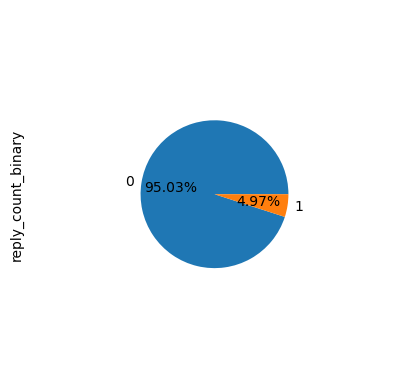

In [62]:
seq_contact_company_df[target].value_counts().plot(kind='pie', autopct='%0.2f%%', radius=0.5)

In [1]:
import lightgbm as lgb